In [ ]:
%tensorflow_version 2.x
from tensorflow import keras

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__ 

'2.4.1'

In [ ]:
keras.__version__

'2.4.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data Set

In [ ]:
# Importing Dataset
wine = pd.read_csv('winequality-red.csv')

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# For each column heading we replace " " and convert the heading in lowercase 
cleancolumn = []
for i in range(len(wine.columns)):
    cleancolumn.append(wine.columns[i].replace(' ', '_'))
wine.columns = cleancolumn

In [ ]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.shape

(1599, 12)

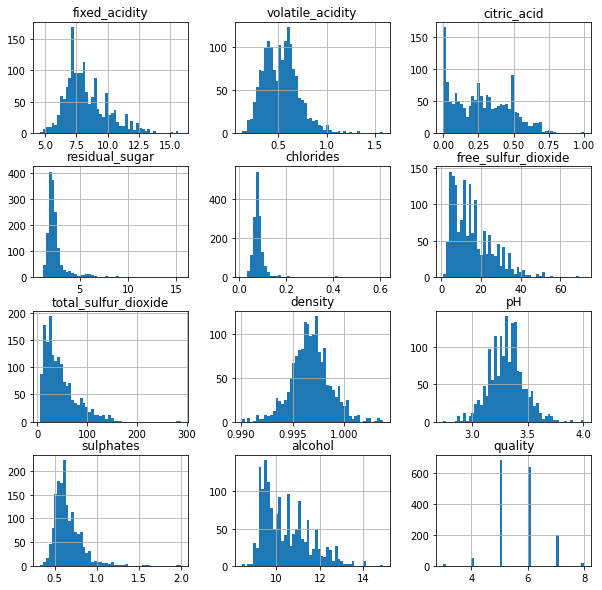

In [ ]:
#Plotting the histograms for the features involved in dataset
wine.hist(bins=50,figsize=(10,10));

In [ ]:
#Correlation 
corr_matrix = wine.corr()
corr_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Outlier Treatment

Describe the data and check which feature has Missing Values and if there is any Outlier.

In [ ]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### residual_sugar

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


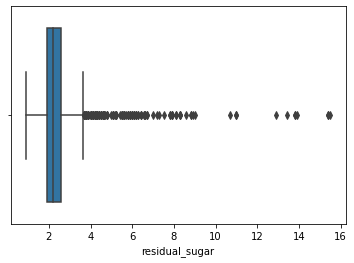

In [ ]:
sns.boxplot('residual_sugar', data = wine)

In [ ]:
wine[wine['residual_sugar']>10]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
324,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
1235,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,4
1244,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1435,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1474,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5


In [ ]:
wine[wine['residual_sugar']>10].index.values

array([  33,  324,  325,  480, 1235, 1244, 1434, 1435, 1474, 1476, 1574])

In [ ]:
wine = wine.drop(wine[wine['residual_sugar']>10].index.values)

In [ ]:
#Capping the outliers
IQR = wine['residual_sugar'].quantile(0.75) - wine['residual_sugar'].quantile(0.25)
upper_limit = wine['residual_sugar'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 3.6500000000000004


In [ ]:
wine['residual_sugar'] = [3.65 if ( x>3.65 and x!=np.nan) else x for x in wine['residual_sugar']]

In [ ]:
wine.shape

(1588, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


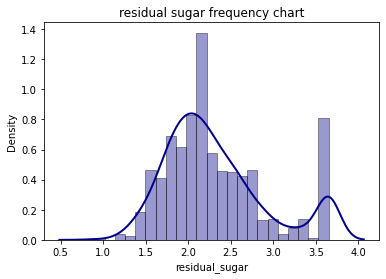

In [ ]:
ax = sns.distplot(wine['residual_sugar'].dropna(), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='residual_sugar') 
plt.title('residual sugar frequency chart'); 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


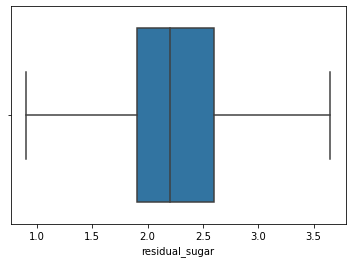

In [ ]:
sns.boxplot('residual_sugar', data = wine)

In [ ]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000
mean,8.317317,0.528407,0.270334,2.313161,0.087243,15.746222,46.207179,0.996720,3.311637,0.658186,10.429125,5.636650
std,1.739245,0.179300,0.194774,0.601461,0.046809,10.218123,32.734601,0.001852,0.154536,0.169874,1.064603,0.808488
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996720,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,3.650000,0.611000,68.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


## chlorides

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


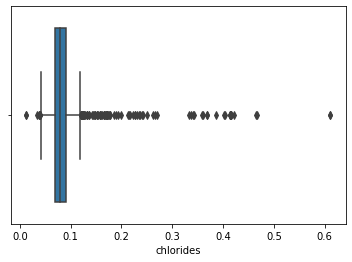

In [ ]:
sns.boxplot('chlorides', data = wine)

In [ ]:
wine[wine['chlorides']>0.5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4
258,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5


In [ ]:
wine[wine['chlorides']>0.5].index.values

array([151, 258])

In [ ]:
wine = wine.drop(wine[wine['residual_sugar']>10].index.values)

In [ ]:
wine[wine['chlorides']<0.04]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
210,9.7,0.53,0.60,2.0,0.039,5.0,19.0,0.99585,3.30,0.86,12.4,6
688,7.7,0.66,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5
695,5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6
797,9.3,0.37,0.44,1.6,0.038,21.0,42.0,0.99526,3.24,0.81,10.8,7
836,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
837,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
861,5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,6
1490,7.1,0.22,0.49,1.8,0.039,8.0,18.0,0.99344,3.39,0.56,12.4,6
1571,6.4,0.38,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6


In [ ]:
wine[wine['chlorides']<0.04].index.values

array([ 210,  688,  695,  797,  836,  837,  861, 1490, 1571])

In [ ]:
wine = wine.drop(wine[wine['chlorides']<0.04].index.values)

In [ ]:
#Capping the outliers
IQR = wine['chlorides'].quantile(0.75) - wine['chlorides'].quantile(0.25)
upper_limit = wine['chlorides'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 0.11999999999999998


In [ ]:
#Capping the outliers
IQR = wine['chlorides'].quantile(0.75) - wine['chlorides'].quantile(0.25)
lower_limit = wine['chlorides'].quantile(0.25) -(IQR*1.5)
print("Lower Limit:", lower_limit)

Lower Limit: 0.04000000000000002


In [ ]:
wine['chlorides'] = [0.1199 if  x>0.1199 else x for x in wine['chlorides']]

In [ ]:
wine['chlorides'] = [0.04 if  x<0.04 else x for x in wine['chlorides']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


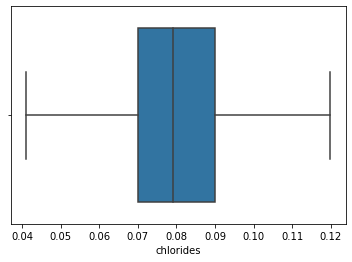

In [ ]:
sns.boxplot('chlorides', data = wine)

## free_sulfur_dioxide

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


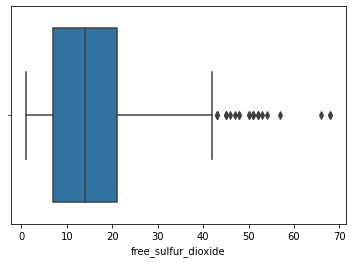

In [ ]:
sns.boxplot('free_sulfur_dioxide', data = wine)

In [ ]:
wine[wine['free_sulfur_dioxide']>60]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
396,6.6,0.735,0.02,3.65,0.1199,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,3.65,0.1199,68.0,124.0,0.99940,3.47,0.53,9.9,5
1558,6.9,0.630,0.33,3.65,0.1199,66.0,115.0,0.99787,3.22,0.56,9.5,5


In [ ]:
wine[wine['free_sulfur_dioxide']>60].index.values

array([ 396,  400, 1558])

In [ ]:
wine = wine.drop(wine[wine['free_sulfur_dioxide']>60].index.values)

In [ ]:
#Capping the outliers
IQR = wine['free_sulfur_dioxide'].quantile(0.75) - wine['free_sulfur_dioxide'].quantile(0.25)
upper_limit = wine['free_sulfur_dioxide'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 42.0


In [ ]:
wine['free_sulfur_dioxide'] = [42 if ( x>42 and x!=np.nan) else x for x in wine['free_sulfur_dioxide']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


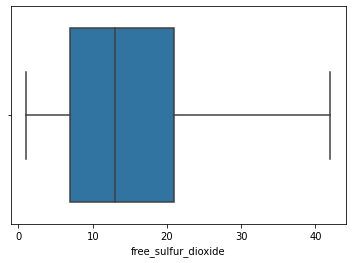

In [ ]:
sns.boxplot('free_sulfur_dioxide', data = wine)

## total_sulfur_dioxide

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


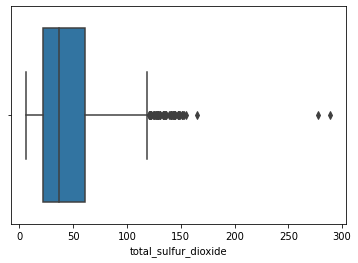

In [ ]:
sns.boxplot('total_sulfur_dioxide', data = wine)

In [ ]:
wine[wine['total_sulfur_dioxide']>200]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1079,7.9,0.3,0.68,3.65,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.3,0.68,3.65,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7


In [ ]:
wine[wine['total_sulfur_dioxide']>200].index.values

array([1079, 1081])

In [ ]:
wine = wine.drop(wine[wine['total_sulfur_dioxide']>200].index.values)

In [ ]:
#Capping the outliers
IQR = wine['total_sulfur_dioxide'].quantile(0.75) - wine['total_sulfur_dioxide'].quantile(0.25)
upper_limit = wine['total_sulfur_dioxide'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 119.5


In [ ]:
wine['total_sulfur_dioxide'] = [119.5 if ( x>119.5 and x!=np.nan) else x for x in wine['total_sulfur_dioxide']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


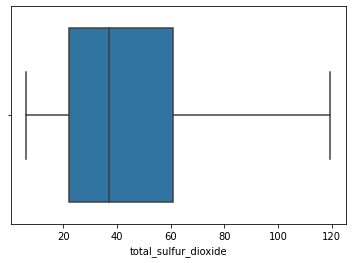

In [ ]:
sns.boxplot('total_sulfur_dioxide', data = wine)

## sulphates

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


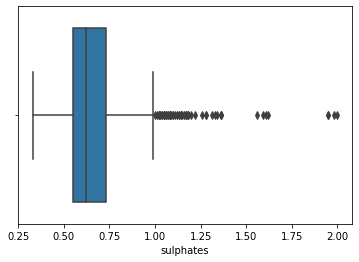

In [ ]:
sns.boxplot('sulphates', data = wine)

In [ ]:
wine[wine['sulphates']>1.70]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
86,8.6,0.49,0.28,1.9,0.1100,20.0,119.5,0.9972,2.93,1.95,9.9,6
91,8.6,0.49,0.28,1.9,0.1100,20.0,119.5,0.9972,2.93,1.95,9.9,6
92,8.6,0.49,0.29,2.0,0.1100,19.0,119.5,0.9972,2.93,1.98,9.8,5
151,9.2,0.52,1.00,3.4,0.1199,32.0,69.0,0.9996,2.74,2.00,9.4,4


In [ ]:
wine[wine['sulphates']>1.70].index.values

array([ 86,  91,  92, 151])

In [ ]:
wine = wine.drop(wine[wine['sulphates']>1.70].index.values)

In [ ]:
#Capping the outliers
IQR = wine['sulphates'].quantile(0.75) - wine['sulphates'].quantile(0.25)
upper_limit = wine['sulphates'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 0.9999999999999999


In [ ]:
wine['sulphates'] = [1 if ( x>1 and x!=np.nan) else x for x in wine['sulphates']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


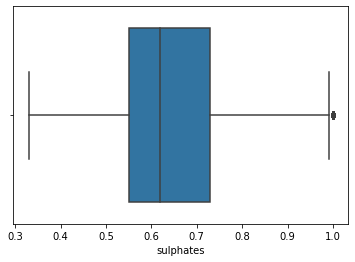

In [ ]:
sns.boxplot('sulphates', data = wine)

## alcohol

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


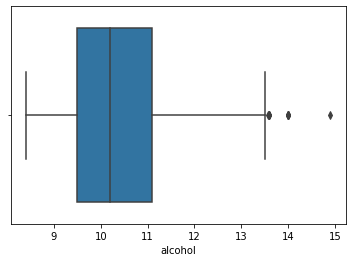

In [ ]:
sns.boxplot('alcohol', data = wine)

In [ ]:
wine[wine['alcohol']>14]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,3.65,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5


In [ ]:
wine[wine['alcohol']>14].index.values

array([652])

In [ ]:
wine = wine.drop(wine[wine['alcohol']>14].index.values)

In [ ]:
#Capping the outliers
IQR = wine['alcohol'].quantile(0.75) - wine['alcohol'].quantile(0.25)
upper_limit = wine['alcohol'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 13.5


In [ ]:
wine['alcohol'] = [13.5 if ( x>13.5 and x!=np.nan) else x for x in wine['alcohol']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


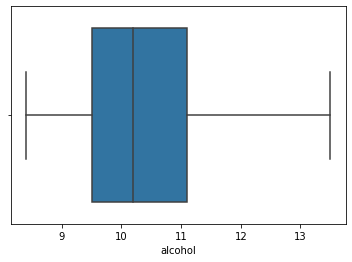

In [ ]:
sns.boxplot('alcohol', data = wine)

In [ ]:
wine.shape

(1569, 12)

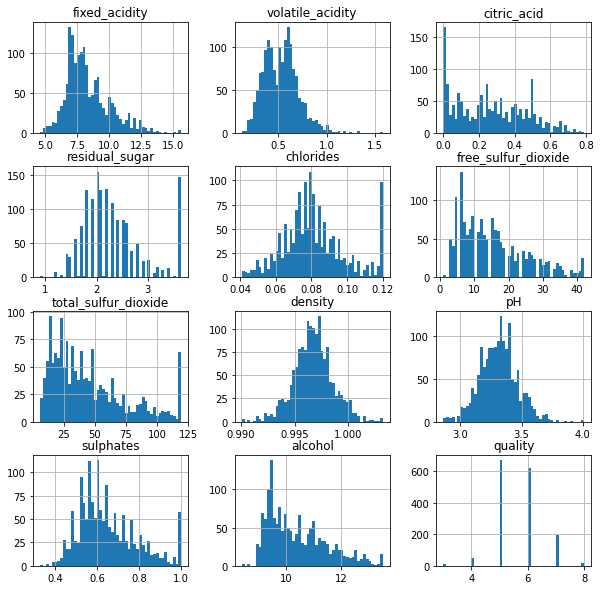

In [ ]:
#Plotting the histograms for the features involved in dataset
wine.hist(bins=50,figsize=(10,10));

In [ ]:
total_len = len(wine['quality'])
percentage_labels = (wine['quality'].value_counts()/total_len)*100
percentage_labels

5    42.829828
6    39.770554
7    12.364563
4     3.250478
8     1.147228
3     0.637349
Name: quality, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


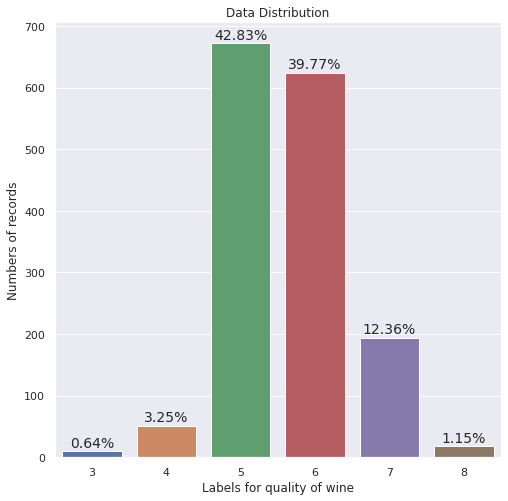

In [ ]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(wine.quality).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_xlabel("Labels for quality of wine")
ax.set_ylabel("Numbers of records")
plt.show()

In [ ]:
#Correlation 
corr_matrix = wine.corr()
corr_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.260384,0.685116,0.226860,0.217854,-0.160574,-0.117390,0.680467,-0.688600,0.205396,-0.060971,0.131313
volatile_acidity,-0.260384,1.000000,-0.559588,0.044886,0.128089,-0.006648,0.093489,0.015109,0.231478,-0.327321,-0.198390,-0.391713
citric_acid,0.685116,-0.559588,1.000000,0.175390,0.157171,-0.074381,0.006688,0.384578,-0.542806,0.335984,0.106980,0.231478
residual_sugar,0.226860,0.044886,0.175390,1.000000,0.201880,0.045413,0.129200,0.420442,-0.084265,0.040885,0.123052,0.030128
chlorides,0.217854,0.128089,0.157171,0.201880,1.000000,-0.035558,0.087717,0.390714,-0.259136,0.089906,-0.280619,-0.171558
free_sulfur_dioxide,-0.160574,-0.006648,-0.074381,0.045413,-0.035558,1.000000,0.681599,-0.058570,0.091753,0.055244,-0.063809,-0.058479
total_sulfur_dioxide,-0.117390,0.093489,0.006688,0.129200,0.087717,0.681599,1.000000,0.086448,-0.030089,-0.005194,-0.238172,-0.212282
density,0.680467,0.015109,0.384578,0.420442,0.390714,-0.058570,0.086448,1.000000,-0.343542,0.149743,-0.483889,-0.165496
pH,-0.688600,0.231478,-0.542806,-0.084265,-0.259136,0.091753,-0.030089,-0.343542,1.000000,-0.117742,0.205294,-0.062192
sulphates,0.205396,-0.327321,0.335984,0.040885,0.089906,0.055244,-0.005194,0.149743,-0.117742,1.000000,0.168084,0.344465


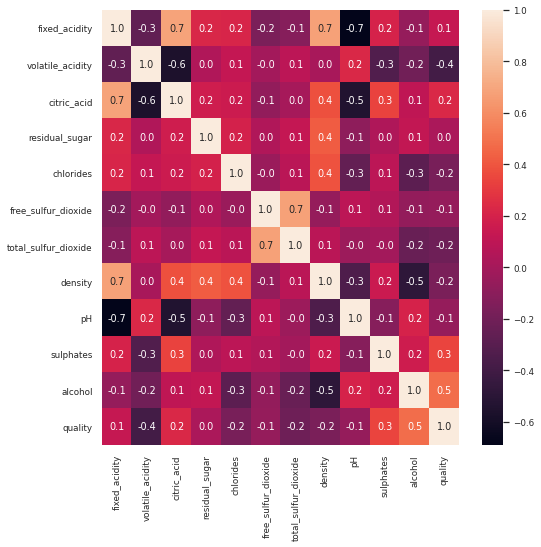

In [ ]:
sns.set(font_scale=0.8)
sns.heatmap(wine[1:].corr(),annot=True,fmt=".1f")
sns.set(rc={'figure.figsize':(25,15)})
plt.show()

In [ ]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1569.000000,1569.00000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,8.321606,0.52891,0.269031,2.310325,0.081259,15.490121,44.949012,0.996735,3.312518,0.649503,10.418026,5.634162
std,1.731958,0.17905,0.193305,0.597197,0.017377,9.640429,29.601579,0.001833,0.152103,0.136139,1.048104,0.807336
min,4.600000,0.12000,0.000000,0.900000,0.041000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.39000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.52000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996740,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.64000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.58000,0.790000,3.650000,0.119900,42.000000,119.500000,1.003200,4.010000,1.000000,13.500000,8.000000


In [ ]:
predictors = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality']      

In [ ]:
wine[predictors]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
wine[target]

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [ ]:
X = wine[predictors].values
y = wine[target].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

In [ ]:
#train and test datasets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size =0.2,random_state=100)

In [ ]:
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

((1255, 11), (314, 11), (1255, 1), (314, 1))

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size=0.2, random_state =100)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1004, 11), (251, 11), (1004, 1), (251, 1))

In [ ]:
# Perform scaling using StandardScaler()
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled.shape, X_valid_scaled.shape, X_test_scaled.shape

((1004, 11), (251, 11), (314, 11))

In [ ]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
smodel = keras.models.Sequential()

In [ ]:
smodel.add(keras.layers.Dense(40,input_shape=(11,),activation="relu")) 
smodel.add(keras.layers.Dense(40,activation="relu"))
smodel.add(keras.layers.Dense(40,activation="relu"))
smodel.add(keras.layers.Dense(40,activation="relu"))
smodel.add(keras.layers.Dense(9,activation='softmax'))

In [ ]:
keras.backend.clear_session()

In [ ]:
smodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 369       
Total params: 5,769
Trainable params: 5,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
smodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
history = smodel.fit(X_train_scaled, y_train ,epochs=100,batch_size=32,validation_data=(X_valid_scaled, y_valid))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 2.0494 - accuracy: 0.3193 - val_loss: 1.4836 - val_accuracy: 0.5299
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3172 - accuracy: 0.5606 - val_loss: 1.1542 - val_accuracy: 0.5657
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0875 - accuracy: 0.5789 - val_loss: 1.0431 - val_accuracy: 0.6056
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9881 - accuracy: 0.6286 - val_loss: 0.9941 - val_accuracy: 0.6135
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9927 - accuracy: 0.5696 - val_loss: 0.9634 - val_accuracy: 0.6175
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9303 - accuracy: 0.6049 - val_loss: 0.9516 - val_accuracy: 0.6135
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9200 - accuracy: 0.6242 - val_loss: 0.9446 - val_accuracy: 0.6414
Epoch 8/100


In [ ]:
y_proba = smodel.predict(X_test_scaled)    # predict() estimates one probablity per class
y_proba

array([[1.0472962e-06, 6.2885039e-09, 2.8280207e-08, ..., 4.8755502e-04,
        2.1308193e-03, 3.3874829e-07],
       [8.2687839e-09, 5.9630079e-10, 8.1337864e-10, ..., 6.9006761e-05,
        3.3649237e-09, 2.1286419e-11],
       [1.4563176e-10, 1.8721131e-12, 9.1036866e-12, ..., 7.9410565e-01,
        9.0952699e-06, 2.2561005e-14],
       ...,
       [2.3288565e-07, 4.5161177e-09, 1.8363806e-08, ..., 7.3633732e-06,
        5.2872306e-06, 1.3963355e-09],
       [2.3873570e-09, 3.3561438e-11, 8.7201968e-11, ..., 1.2415792e-05,
        2.0462732e-08, 3.6873068e-13],
       [1.0257525e-09, 3.3420489e-10, 5.3375468e-09, ..., 5.1637931e-04,
        4.1009493e-02, 9.5847166e-01]], dtype=float32)

In [ ]:
y_proba[0:2]

array([[1.0472962e-06, 6.2885039e-09, 2.8280207e-08, 5.2764466e-05,
        2.7298715e-03, 9.9459755e-01, 4.8755502e-04, 2.1308193e-03,
        3.3874829e-07],
       [8.2687839e-09, 5.9630079e-10, 8.1337864e-10, 2.6242542e-05,
        1.2174187e-04, 9.9978298e-01, 6.9006761e-05, 3.3649237e-09,
        2.1286419e-11]], dtype=float32)

In [ ]:
y_proba.argmax(axis=1)

array([5, 5, 6, 6, 6, 7, 5, 6, 5, 5, 5, 6, 6, 7, 6, 6, 5, 5, 7, 6, 5, 6,
       7, 6, 7, 5, 7, 5, 5, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6,
       7, 4, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 7, 7,
       6, 6, 6, 6, 7, 7, 7, 7, 6, 5, 5, 5, 5, 6, 5, 5, 6, 3, 6, 6, 6, 6,
       6, 6, 5, 7, 6, 8, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6,
       5, 5, 7, 7, 6, 5, 5, 5, 6, 6, 6, 7, 6, 6, 5, 7, 6, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 7, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6,
       6, 6, 6, 4, 5, 5, 5, 5, 7, 6, 6, 6, 6, 5, 6, 5, 7, 7, 5, 5, 6, 5,
       6, 8, 5, 7, 6, 5, 5, 5, 5, 6, 7, 6, 7, 5, 7, 5, 5, 5, 5, 6, 6, 7,
       5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 7, 7, 7, 6,
       6, 6, 6, 6, 5, 6, 6, 7, 4, 6, 6, 6, 6, 7, 6, 5, 6, 6, 7, 5, 5, 7,
       7, 6, 6, 5, 5, 5, 6, 7, 6, 5, 7, 6, 7, 5, 5, 5, 6, 5, 5, 6, 5, 7,
       5, 6, 7, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5, 6, 7,

In [ ]:
y_pred = smodel.predict_classes(X_test_scaled)   # predict_classes() outputs the class with highest estimated probability
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 5, 6, 6, 6, 7, 5, 6, 5, 5, 5, 6, 6, 7, 6, 6, 5, 5, 7, 6, 5, 6,
       7, 6, 7, 5, 7, 5, 5, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6,
       7, 4, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 7, 7,
       6, 6, 6, 6, 7, 7, 7, 7, 6, 5, 5, 5, 5, 6, 5, 5, 6, 3, 6, 6, 6, 6,
       6, 6, 5, 7, 6, 8, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6,
       5, 5, 7, 7, 6, 5, 5, 5, 6, 6, 6, 7, 6, 6, 5, 7, 6, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 7, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6,
       6, 6, 6, 4, 5, 5, 5, 5, 7, 6, 6, 6, 6, 5, 6, 5, 7, 7, 5, 5, 6, 5,
       6, 8, 5, 7, 6, 5, 5, 5, 5, 6, 7, 6, 7, 5, 7, 5, 5, 5, 5, 6, 6, 7,
       5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 7, 7, 7, 6,
       6, 6, 6, 6, 5, 6, 6, 7, 4, 6, 6, 6, 6, 7, 6, 5, 6, 6, 7, 5, 5, 7,
       7, 6, 6, 5, 5, 5, 6, 7, 6, 5, 7, 6, 7, 5, 5, 5, 6, 5, 5, 6, 5, 7,
       5, 6, 7, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5, 6, 7,

In [ ]:
X_test_scaled[0]

array([-1.13272075,  0.80379463, -1.106429  , -1.22082943, -1.73177547,
       -0.92235423, -0.87471845, -1.67691091,  1.74090364, -0.84654328,
        1.4508361 ])

In [ ]:
y_actual = np.argmax(y_test,axis=1)

In [ ]:
y_actual

array([5, 5, 3, 5, 7, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 7, 6, 5, 5,
       7, 7, 7, 5, 8, 6, 5, 7, 6, 6, 6, 6, 4, 5, 6, 6, 6, 6, 5, 7, 6, 7,
       7, 5, 7, 6, 7, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 7,
       6, 6, 6, 6, 8, 7, 7, 6, 5, 5, 6, 5, 5, 7, 7, 5, 6, 4, 6, 6, 5, 7,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 4, 5, 6, 6, 5, 6, 7, 5, 6, 5, 6,
       4, 5, 7, 7, 6, 5, 5, 4, 5, 6, 6, 7, 6, 6, 5, 4, 7, 5, 5, 5, 5, 6,
       5, 5, 5, 7, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 7, 6, 5, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6,
       6, 5, 6, 5, 5, 5, 5, 5, 7, 6, 7, 6, 6, 5, 6, 5, 7, 7, 6, 5, 6, 6,
       6, 7, 5, 7, 7, 5, 5, 5, 5, 5, 8, 6, 7, 5, 6, 5, 5, 7, 5, 5, 6, 7,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 7, 6,
       4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 5, 6, 7,
       6, 6, 6, 5, 5, 6, 5, 8, 5, 5, 7, 6, 7, 5, 5, 5, 6, 5, 5, 4, 6, 7,
       4, 5, 6, 5, 5, 6, 6, 5, 5, 7, 7, 5, 6, 6, 5,

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_actual,y_pred)

array([[ 0,  0,  0,  1,  0,  0],
       [ 1,  0,  5,  2,  1,  0],
       [ 0,  2, 88, 36,  3,  0],
       [ 0,  1, 27, 83, 12,  2],
       [ 0,  0,  3, 16, 25,  2],
       [ 0,  0,  0,  0,  4,  0]])

In [ ]:
cf=pd.DataFrame(confusion_matrix(y_actual,y_pred), index=range(3,9),columns=range(3,9))
cf

,3,4,5,6,7,8
3,0,0,0,1,0,0
4,1,0,5,2,1,0
5,0,2,88,36,3,0
6,0,1,27,83,12,2
7,0,0,3,16,25,2
8,0,0,0,0,4,0


In [ ]:
test_loss, test_acc = smodel.evaluate(X_test_scaled, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.9470 - accuracy: 0.6242


In [ ]:
print('test_acc:', test_acc)
print('test_loss :', test_loss)

test_acc: 0.6242038011550903
test_loss : 1.9469940662384033


**Plot Accuracy and Loss graph**

In [ ]:
import matplotlib.pyplot as plt

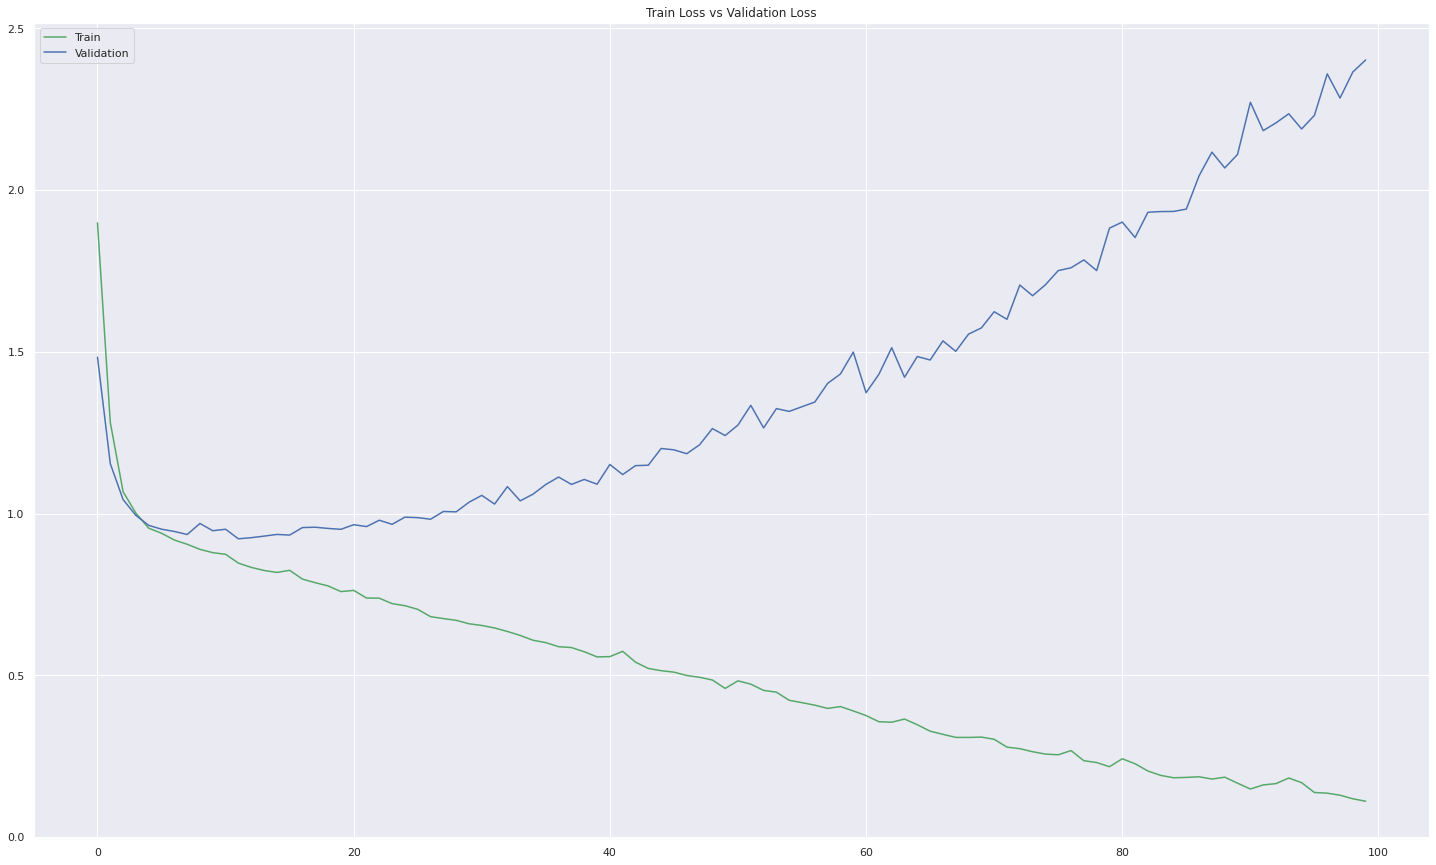

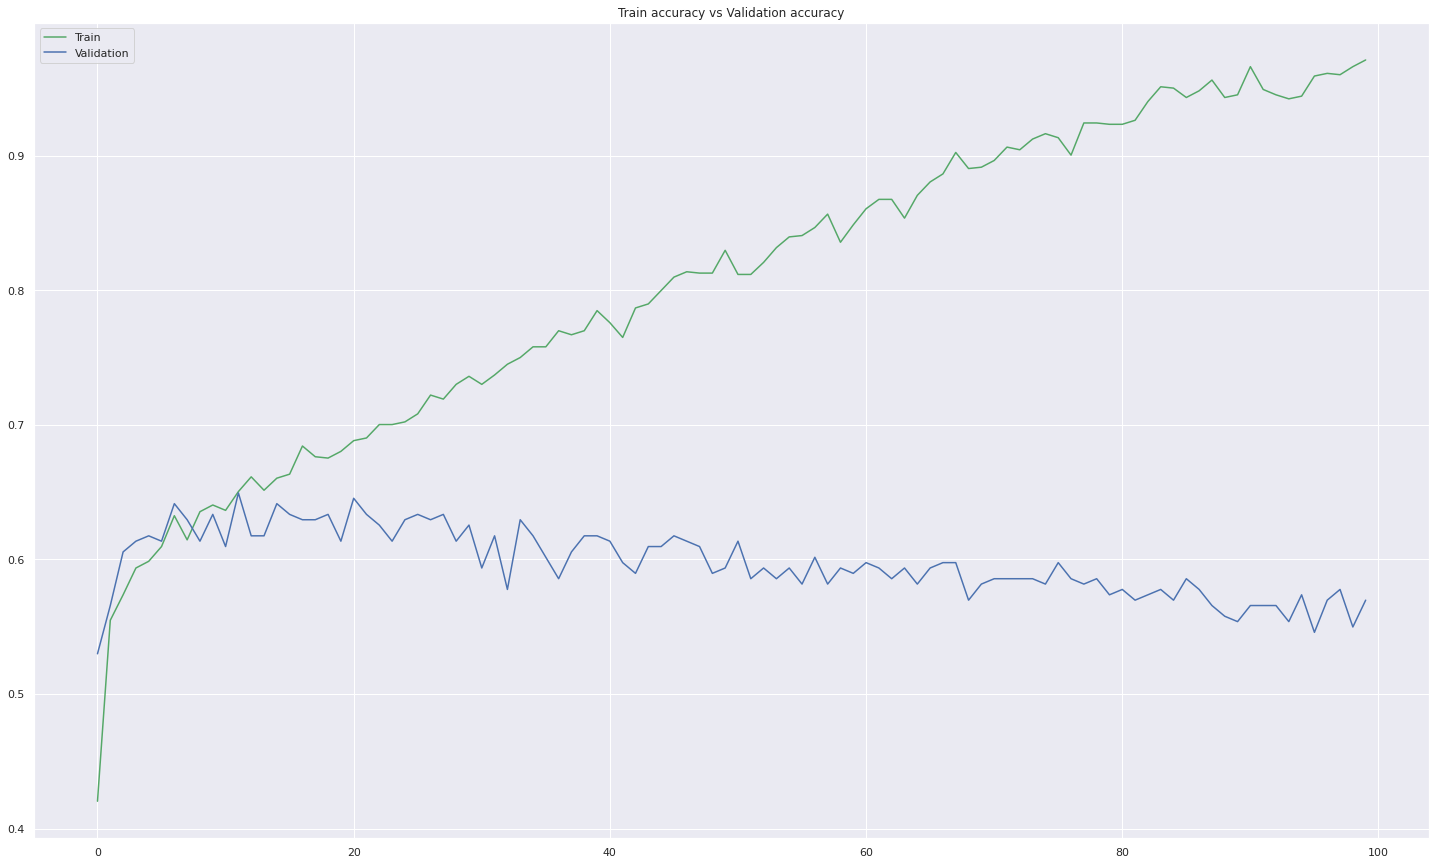

In [ ]:
plt.figure()
plt.plot(history.history['loss'],'-g')
plt.plot(history.history['val_loss'],'-b')
plt.legend(['Train','Validation'])
plt.title('Train Loss vs Validation Loss')
plt.figure()
plt.plot(history.history['accuracy'],'-g')
plt.plot(history.history['val_accuracy'],'-b')
plt.legend(['Train','Validation'])
plt.title('Train accuracy vs Validation accuracy');